# **Importation des bibliothèques:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import csv
import matplotlib.pyplot as plt
import numpy
from google.colab import files
import pandas as pd
import math

# **Importation des fichiers:**

In [ ]:
importer = files.upload()
Test = 'Spam detection - For prediction.csv'
Apprentissage = 'Spam detection - For model creation.csv'




Saving Spam detection - For model creation.csv to Spam detection - For model creation.csv
Saving Spam detection - For prediction.csv to Spam detection - For prediction.csv


# **Répartition des données de l'entrainement en train_x et train_y:**

In [ ]:
training_data = open(Apprentissage, 'rt')
train_data= csv.reader(training_data, delimiter=';', quoting=csv.QUOTE_NONE)
X= list(train_data)
donne_1 = numpy.array(X[1:])
train_x = donne_1[:,1:]
train_y = donne_1[:,0]
train_x = train_x.astype('float')
train_y = [0 if i=='No' else 1  for i in train_y]
train_y = numpy.array(train_y)



# **Répartition des données du test en test_x et test_y:**

In [ ]:
test_data = open(Test, 'rt')
RD = csv.reader(test_data, delimiter=',', quoting=csv.QUOTE_NONE)
Y= list(RD)
donne_2 = numpy.array(Y[1:])
test_y = donne_2[:,57]
test_x = donne_2[:,:57]
test_x = test_x.astype('float')
test_y = test_y.astype('float')
print(test_y)


[0. 0. 1. ... 1. 1. 1.]


#**Modèle RN sans couches cachées**


### **Création du modèle:**

In [ ]:
M1= tf.keras.models.Sequential()
M1.add(tf.keras.layers.Dense(units=1, activation='sigmoid', input_dim=57, ))
M1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = M1.fit(train_x, train_y, epochs=150 )


Epoch 1/150
93/93 [==============================] - 1s 4ms/step - loss: 2.1739 - accuracy: 0.5542
Epoch 2/150
93/93 [==============================] - 0s 3ms/step - loss: 1.4057 - accuracy: 0.6592
Epoch 3/150
93/93 [==============================] - 0s 5ms/step - loss: 0.9881 - accuracy: 0.7503
Epoch 4/150
93/93 [==============================] - 0s 4ms/step - loss: 0.8276 - accuracy: 0.7840
Epoch 5/150
93/93 [==============================] - 1s 6ms/step - loss: 0.7318 - accuracy: 0.8102
Epoch 6/150
93/93 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.8267
Epoch 7/150
93/93 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.8324
Epoch 8/150
93/93 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.8526
Epoch 9/150
93/93 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.8577
Epoch 10/150
93/93 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.8617
Epoch 11/

### **Précision/perte par rapport aux epoques:**

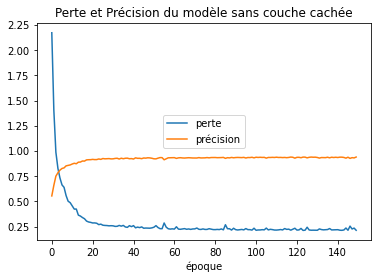

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Perte et Précision du modèle sans couche cachée')
plt.xlabel('époque')
plt.legend(['perte', 'précision'], loc='center')
plt.show()

### **Test de la précision et de la perte du modèle avec les données de test:**

In [ ]:
accuracy1 = M1.evaluate(test_x, test_y)
print('Perte',accuracy1[0])
print('Précision',accuracy1[1])

40/40 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9388
Perte 0.18084950745105743
Précision 0.9387755393981934


#**Modèle RN avec une couche cachée**

In [ ]:
M2 = tf.keras.models.Sequential()
M2.add(tf.keras.layers.Dense(57, input_dim=57, activation='sigmoid'))
M2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
M2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = M2.fit(train_x, train_y, epochs= 150)

Epoch 1/150
93/93 [==============================] - 1s 2ms/step - loss: 0.6317 - accuracy: 0.6447
Epoch 2/150
93/93 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7897
Epoch 3/150
93/93 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8392
Epoch 4/150
93/93 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8668
Epoch 5/150
93/93 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8910
Epoch 6/150
93/93 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.9017
Epoch 7/150
93/93 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.9034
Epoch 8/150
93/93 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9118
Epoch 9/150
93/93 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9176
Epoch 10/150
93/93 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9179
Epoch 11/

### **Précision/perte par rapport aux epoques:**

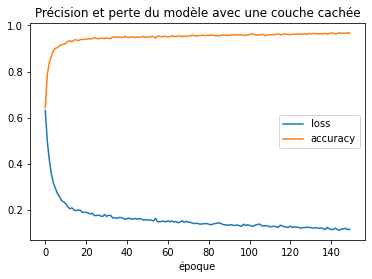

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Précision et perte du modèle avec une couche cachée')
plt.xlabel('époque')
plt.legend(['loss', 'accuracy'], loc='center right')
plt.show()

### **Test de la précision et de la perte du modèle avec les données de test:**


In [ ]:
accuracy2 = M2.evaluate(test_x, test_y)
print('Perte',accuracy2[0])
print('Précision',accuracy2[1])

40/40 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9623
Perte 0.12429545074701309
Précision 0.9623233675956726


# **Modèle basé sur réseau de Bayes naif**

### **Séparation des données en Spam et non Spam:**

In [ ]:
train_yr = train_y.reshape(train_y.shape[0],1)
FullT= numpy.hstack((train_x, train_yr))

SpamT= FullT[FullT[:, -1] == 1]
NotSpamT = FullT[FullT[:, -1] == 0]
x_Spam = SpamT[:,:-1]
x_NotSpam = NotSpamT[:,:-1]



### **Calcul de la variance et de l'esperance:**

In [ ]:
taille_x_Spam = x_Spam.shape[0]
taille_x_NotSpam = x_NotSpam.shape[0]

vari_spam=[None] * x_Spam.shape[1]
vari_notspam=[None] * x_NotSpam.shape[1]

esper_spam = x_Spam.sum(axis=0) / taille_x_Spam
esper_notspam = x_NotSpam.sum(axis=0) / taille_x_NotSpam

for column in range(x_Spam.shape[1]):
  all = 0
  for row in range(x_Spam.shape[0]) :
    all += (esper_spam[column] - x_Spam[row][column])**2

  vari_spam[column] = all / (taille_x_Spam -1)

for column in range(x_NotSpam.shape[1]):
  all = 0
  for row in range(x_NotSpam.shape[0]) :
    all += (esper_notspam[column] - x_NotSpam[row][column])**2
  vari_notspam[column] = all / (taille_x_NotSpam -1)


### **Définition de la méthode de prédiction:**

In [ ]:
def prediction(tab):
  proba_notspam = taille_x_NotSpam / (taille_x_Spam + taille_x_NotSpam)
  for column in range(x_NotSpam.shape[1]) :
    try:
      x=  1 / math.sqrt( 2 * math.pi * vari_notspam[column] )
      y= -1 / ( 2 * vari_notspam[column] )
      z=  (esper_notspam[column] - tab[column])**2
      f = x * math.exp(z*y)
      prob_notspam = proba_notspam * f
    except ZeroDivisionError:
      pass
  prob_spam = taille_x_NotSpam / (taille_x_Spam + taille_x_NotSpam)
  for column in range(x_NotSpam.shape[1]) :
    try:
      x=  1 / math.sqrt( 2 * math.pi * vari_spam[column] )
      y= -1 / ( 2 * vari_spam[column] )
      z=  (esper_spam[column] - tab[column])**2
      f = x * math.exp(z*y)
      prob_spam = prob_spam * f
    except ZeroDivisionError:
      pass
  if(prob_notspam>prob_spam):
    return 0
  else :
    return 1

### **Test de précision:**

In [ ]:
vrai = 0
all = 0
for i in range(test_x.shape[0]):
  prediction_result = prediction(test_x[i])
  if (prediction_result == test_y[i]):
    vrai+=1
  all +=1
pres =  vrai / all
print("vrai = ",vrai)
print("total = ",all)
print("précision = ",pres)
accuracy3 = [(1-pres), pres]


vrai =  913
total =  1274
précision =  0.716640502354788


# **Comparaison des trois modèles:**

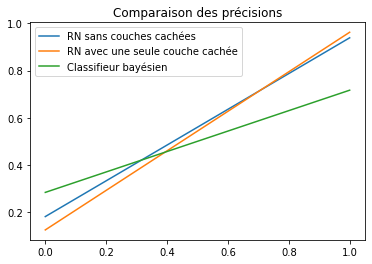

In [ ]:
ax = plt.subplot(111)
plt.plot(accuracy1)
plt.plot(accuracy2)
plt.plot(accuracy3)
plt.title("Comparaison des précisions")
ax.legend(('RN sans couches cachées','RN avec une seule couche cachée', 'Classifieur bayésien'))